#**Import Neccessary Tools**
 Here , I import all necessary Python library to complete my task.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report
import random
from numpy.random import seed
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#**Import Google Drive**
Here, I import the link of google drive so that I can access the data that I upload in google drive for analysis.

In [ ]:
from google.colab import drive #import drive
drive.mount('/content/drive')  #mount

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Read CSV File**

Here, I read breast cancer wisconsin csv file

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/breast-cancer-wisconsin.csv',header = None) #read csv file

#**Shape of data set**

This data set contain 569 row and 32 columns

In [ ]:
data_set.shape #check data shape of the data set

(569, 32)

#**Information about Data**
From the below output, we see that our data set contain 569 entries and 32 columns. In my data set there is no null values, and all data type is float except first column and 2nd column. Here, second column is our target that is object dtype and 1st column is id that is int dtype.

In [ ]:
data_set.info() #information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

# **Drop first column**

In [ ]:
data_set.drop(data_set.columns[0], axis=1, inplace=True) #drop id(1st) column


# Maping Target
Here, I set M = 1 and B = 0

In [ ]:
data_set[1] = data_set[1].map({'M':1,'B':0}) #maping


# Spliting Data Into Train and Test

In [ ]:
y = data_set[1] #set target
X = data_set.drop([1],axis = 1) #features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30, random_state= 0) #split the data into train and test

# Scaling Data

In [ ]:
a =StandardScaler() #standardscaler function
X_train = a.fit_transform(X_train) #scaling the train data
X_test = a.fit_transform(X_test) #scaling the test data

#**1 Logistic Regression**
To predict breast cancer here I use logistic regression model, it is one of the classification algorithms that is used in binary classification problems.

In [ ]:
l_model = LogisticRegression() #define model
lg_model = l_model.fit(X_train, y_train) #fit model
lg_prediction = lg_model.predict(X_test) #predict using testing data
#lg_score = accuracy_score(y_test, lg_prediction) #accuracy score
lg_score = round(accuracy_score(y_test, lg_prediction) * 100, 2) #round the value of accuracy score
print("The accuracy score of Logestic regression is = ",lg_score) #print accuracy score

The accuracy score of Logestic regression is =  96.49


### **1.1 Confusion Metrix**

We use confusion metrics to see the performance of classification algorithm. Confusion matrics represent the value of true positive(tp), false positive(fp) ,true negative(tn) and false negative(fn). Here,
**True Positive** means the model predict class equal 1 (positive) and the actual class is equal also 1(positive). **False Positive**  means the model predict class equal 1(positive) and the actual class is equal 0(negative). **True Negative** means the model predict class equal 0(negative) and the actual class is equal also 0(negative). **False Negative** means the predict class equal 0(negative) and the actual class is equal 1(positive). From this confusion metrics, we can say that the result 104 and 61 is correct prediction where 2 and 4 is wrong prediction.



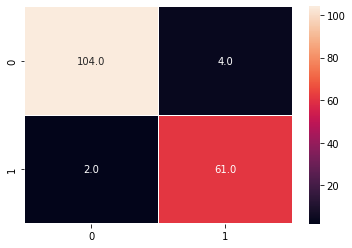

In [ ]:
confution_lg = confusion_matrix(y_test, lg_prediction) #confusion metrics
sns.heatmap(confution_lg, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### **1.2 Classification Report**
Here, I use classification report function to see the precision, recall and f1-score.
The formula of precision is equal  TP / (TP + FP). **Precision** value 1 means there is no false positive value in model prediction. High precision value means low FP values. **Recall** means the rate of FN. The formula of recall = TP / (TP + FN).  High recall value means low FN values. The formula of **f1-score** is equal f1 = ((precision * recall) * 2) / (precision + recall). F1-score 1 means good classifier and F1-score 0 means bad classifier.

In [ ]:
classification_r =classification_report(y_test,lg_prediction) #classification report
print(classification_r)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### **1.3 Receiver Operating Characteristic(ROC) curve**

ROC show the rate of true possitive against false positive

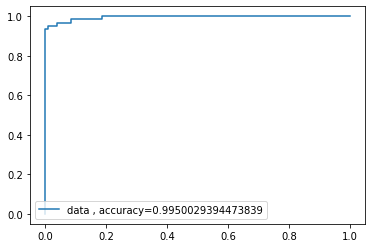

In [ ]:
y_pre = lg_model.predict_proba(X_test)[::,1]
fr,tr, _ = metrics.roc_curve(y_test, y_pre)
auc = metrics.roc_auc_score(y_test,y_pre)
plt.plot(fr,tr,label = "data , accuracy="+str(auc)) #
plt.legend(loc=3)
plt.show()

#**2 Support Vector Machine**

Support vector machine is another machine learning algorithms that I use to predict breast cancer in my project. It is a classification algorithm that can predict breast cancer.

In [ ]:
support_vm = svm.SVC(probability=True) #define model
svm_model = support_vm.fit(X_train, y_train) #fit model
svm_prediction = svm_model.predict(X_test) #predict
svm_score = round(accuracy_score(y_test, svm_prediction) * 100, 2) #round the value
print("The accuracy score of Support vector machine is = ",svm_score) #print score

The accuracy score of Support vector machine is =  97.66


### **2.1 Confusion Metrix**

We use confusion metrics to see the performance of classification algorithm. Confusion matrics represent the value of true positive(tp), false positive(fp) ,true negative(tn) and false negative(fn). Here,
**True Positive** means the model predict class equal 1 (positive) and the actual class is equal also 1(positive). **False Positive**  means the model predict class equal 1(positive) and the actual class is equal 0(negative). **True Negative** means the model predict class equal 0(negative) and the actual class is equal also 0(negative). **False Negative** means the predict class equal 0(negative) and the actual class is equal 1(positive). From this confution metrics, we can say that the result 107 and 60 is correct prediction where 1 and 3 is wrong prediction.



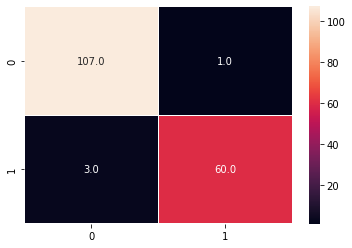

In [ ]:
confution_svm = confusion_matrix(y_test, svm_prediction) #confusion metrics
sns.heatmap(confution_svm, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### **2.2 Classification Report**
Here, I use classification report function to see the precision, recall and f1-score.
The formula of precision is equal  TP / (TP + FP). **Precision** value 1 means there is no false positive value in model prediction. High precision value means low FP values. **Recall** means the rate of FN. The formula of recall = TP / (TP + FN).  High recall value means low FN values. The formula of **f1-score** is equal f1 = ((precision * recall) * 2) / (precision + recall). F1-score 1 means good classifier and F1-score 0 means bad classifier.

In [ ]:
classification_svm =classification_report(y_test,svm_prediction) #classification report
print(classification_svm)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### **2.3 Receiver Operating Characteristic(ROC) curve**

ROC show the rate of true possitive against false positive

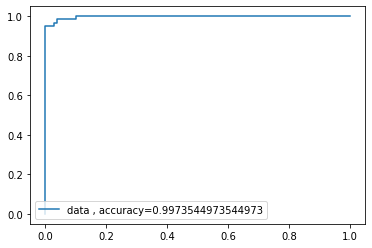

In [ ]:
y_pre = svm_model.predict_proba(X_test)[::,1]
fr,tr, _ = metrics.roc_curve(y_test, y_pre)
auc = metrics.roc_auc_score(y_test,y_pre)
plt.plot(fr,tr,label = "data , accuracy="+str(auc)) #
plt.legend(loc=3)
plt.show()

#**3 K Neighbors Classifiers (KNN)**
In my project I use K-Nearest Neighbour (KNN) to predict breast cancer. It is one of the easiest algorithms that is used in classification, and the idea behind this algorithm is put similar things together.

In [ ]:
k = KNeighborsClassifier(n_neighbors= 5) #define model
knn_model = k.fit(X_train, y_train) #fit model
knn_prediction = knn_model.predict(X_test) #predict model with test data
knn_score = round(accuracy_score(y_test, knn_prediction) * 100, 2) #round the value
print("The accuracy score of KNN is = ",knn_score) #print score

The accuracy score of KNN is =  94.74


### **3.1 Confusion Metrix**

We use confusion metrics to see the performance of classification algorithm. Confusion matrics represent the value of true positive(tp), false positive(fp) ,true negative(tn) and false negative(fn). Here,
**True Positive** means the model predict class equal 1 (positive) and the actual class is equal also 1(positive). **False Positive**  means the model predict class equal 1(positive) and the actual class is equal 0(negative). **True Negative** means the model predict class equal 0(negative) and the actual class is equal also 0(negative). **False Negative** means the predict class equal 0(negative) and the actual class is equal 1(positive). From this confution metrics, we can say that the result 105 and 57 is correct prediction where 6 and 3 is wrong prediction.



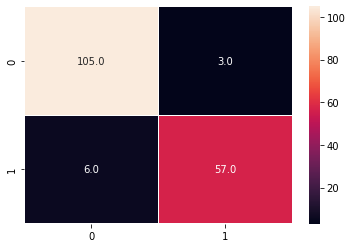

In [ ]:
confution_knn = confusion_matrix(y_test, knn_prediction) #confusion matrix
sns.heatmap(confution_knn, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### **3.2 Classification Report**
Here, I use classification report function to see the precision, recall and f1-score.
The formula of precision is equal  TP / (TP + FP). **Precision** value 1 means there is no false positive value in model prediction. High precision value means low FP values. **Recall** means the rate of FN. The formula of recall = TP / (TP + FN).  High recall value means low FN values. The formula of **f1-score** is equal f1 = ((precision * recall) * 2) / (precision + recall). F1-score 1 means good classifier and F1-score 0 means bad classifier.

In [ ]:
classification_knn =classification_report(y_test,knn_prediction)
print(classification_knn)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#**4 Decision Tree Classifier**
We use decision tree algorithms for both classification and regression task, and it is a type of supervised learning algorithms.  It is one of the easy algorithms to understand, and the main aim of this algorithms is to build a model using training data that can take decision for new data. Here, I use this algorithms to predict breast cancer.

In [ ]:
d = DecisionTreeClassifier() # define model
dtc_model = d.fit(X_train, y_train) #fit model
dtc_prediction = dtc_model.predict(X_test) # predict
dtc_score = round(accuracy_score(y_test, dtc_prediction) * 100, 2) #round the value
print("The accuracy score of the model is = ",dtc_score) #print score

The accuracy score of the model is =  90.64


### **4.1 Confusion Metrix**

We use confusion metrics to see the performance of classification algorithm. Confusion matrics represent the value of true positive(tp), false positive(fp) ,true negative(tn) and false negative(fn). Here,
**True Positive** means the model predict class equal 1 (positive) and the actual class is equal also 1(positive). **False Positive**  means the model predict class equal 1(positive) and the actual class is equal 0(negative). **True Negative** means the model predict class equal 0(negative) and the actual class is equal also 0(negative). **False Negative** means the predict class equal 0(negative) and the actual class is equal 1(positive). From this confution metrics, we can say that the result 100 and 59 is correct prediction where 8 and 4 is wrong prediction.



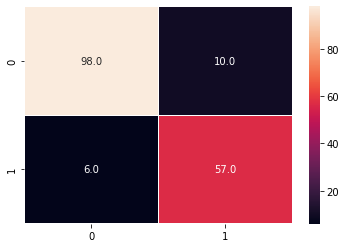

In [ ]:
confution_dtc = confusion_matrix(y_test, dtc_prediction) #confusion matrix
sns.heatmap(confution_dtc, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### **4.2 Classification Report**
Here, I use classification report function to see the precision, recall and f1-score.
The formula of precision is equal  TP / (TP + FP). **Precision** value 1 means there is no false positive value in model prediction. High precision value means low FP values. **Recall** means the rate of FN. The formula of recall = TP / (TP + FN).  High recall value means low FN values. The formula of **f1-score** is equal f1 = ((precision * recall) * 2) / (precision + recall). F1-score 1 means good classifier and F1-score 0 means bad classifier.

In [ ]:
classification_dtc =classification_report(y_test,dtc_prediction)
print(classification_dtc)


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       108
           1       0.85      0.90      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



### **4.3 Receiver Operating Characteristic(ROC) curve**

ROC show the rate of true possitive against false positive

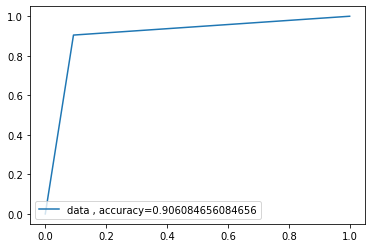

In [ ]:
y_pre = dtc_model.predict_proba(X_test)[::,1]
fr,tr, _ = metrics.roc_curve(y_test, y_pre)
auc = metrics.roc_auc_score(y_test,y_pre)
plt.plot(fr,tr,label = "data , accuracy="+str(auc))
plt.legend(loc=3)
plt.show()

#5 Random Forest Classifier
Random Forest is one of the machine learning algorithms that is used in both classification and regression problems. Random forest is well known algorithm in medical sectors to detect disease. I use this classification technique in my project to predict breast cancer.

In [ ]:
seed(2)
r = RandomForestClassifier(n_estimators=50, max_depth=3,random_state=0)
#r = RandomForestClassifier(n_estimators=10) #define model
rdf_model = d.fit(X_train, y_train) #fit
rdf_prediction = rdf_model.predict(X_test) #predict
rdf_score = round(accuracy_score(y_test, rdf_prediction) * 100, 2) #round the value
print("The accuracy score of the model is = ",rdf_score) #print score

The accuracy score of the model is =  92.4


### **5.1 Confusion Metrix**

We use confusion metrics to see the performance of classification algorithm. Confusion matrics represent the value of true positive(tp), false positive(fp) ,true negative(tn) and false negative(fn). Here,
**True Positive** means the model predict class equal 1 (positive) and the actual class is equal also 1(positive). **False Positive**  means the model predict class equal 1(positive) and the actual class is equal 0(negative). **True Negative** means the model predict class equal 0(negative) and the actual class is equal also 0(negative). **False Negative** means the predict class equal 0(negative) and the actual class is equal 1(positive). From this confution metrics, we can say that the result 98 and 58 is correct prediction where 10 and 5 is wrong prediction.



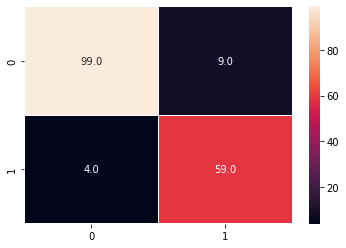

In [ ]:
confution_rdf = confusion_matrix(y_test, rdf_prediction) #confusion matrix
sns.heatmap(confution_rdf, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### **5.2 Classification Report**
Here, I use classification report function to see the precision, recall and f1-score.
The formula of precision is equal  TP / (TP + FP). **Precision** value 1 means there is no false positive value in model prediction. High precision value means low FP values. **Recall** means the rate of FN. The formula of recall = TP / (TP + FN).  High recall value means low FN values. The formula of **f1-score** is equal f1 = ((precision * recall) * 2) / (precision + recall). F1-score 1 means good classifier and F1-score 0 means bad classifier.

In [ ]:
classification_rdf =classification_report(y_test,rdf_prediction)
print(classification_rdf)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.87      0.94      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



### **5.3 Receiver Operating Characteristic(ROC) curve**

ROC show the rate of true possitive against false positive

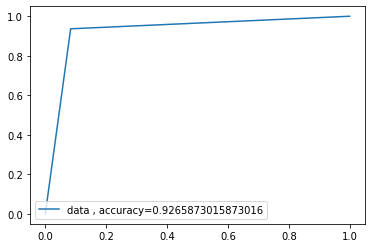

In [ ]:
y_pre = rdf_model.predict_proba(X_test)[::,1]
fr,tr, _ = metrics.roc_curve(y_test, y_pre)
auc = metrics.roc_auc_score(y_test,y_pre)
plt.plot(fr,tr,label = "data , accuracy="+str(auc))
plt.legend(loc=3)
plt.show()

#**6 Model Accuracy**
Here, we see that SVM algorithm gives the high accuracy (97.66%) compared to others algorithms.

,Model,SCORE
1,SVM,97.66
2,LOGISTIC REGRESSION,96.49
0,KNN,94.74
3,RANDOM FOREST,92.40
4,DECISION TREE,90.64


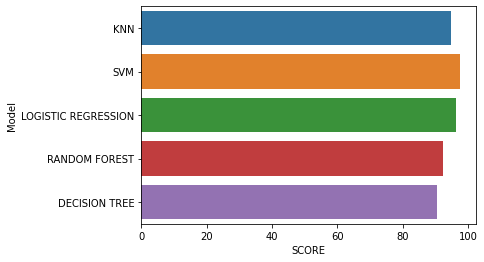

In [ ]:
m = pd.DataFrame({'Model':['KNN','SVM','LOGISTIC REGRESSION','RANDOM FOREST','DECISION TREE'], 'SCORE':[knn_score,svm_score,lg_score,rdf_score,dtc_score]})
sns.barplot(x = 'SCORE', y = 'Model',data = m)
m.sort_values(by = 'SCORE',ascending = False)